# Housing Price Prediction : Regularized Regression Techniques

## Libraries

In [76]:
#Importing necessary libraries
import pandas as pd
import numpy as np

#Importing Libraries for Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing libraries for Data Preprocessing
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

#Importing libraries for Machine Learning
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

## 1. Importing and loading the Dataset

In [77]:
#Loading the train and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## 2.Preliminary Exploratory Data Analysis

In [78]:
#Exploring the traning dataset
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [79]:
train_df.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [80]:
#Exploring the test dataset
test_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [81]:
test_df.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1449,2910,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1450,2911,160,RM,21.0,1484,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
1451,2912,20,RL,80.0,13384,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
1452,2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml
1453,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [82]:
#Shape of training and test datasets
print("The shape of the train dataset is: %s" % str(train_df.shape))
print("The shape of the train dataset is: %s" % str(test_df.shape))

The shape of the train dataset is: (1460, 81)
The shape of the train dataset is: (1459, 80)


In [83]:
#Ffeatures of the traning dataset
print(train_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [84]:
#Feature datatypes and non null counts
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [85]:
#Statistical summary of target variable
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## 3.Comprehensive Visual Exploratory Data Analysis

Text(0.5, 1.0, 'SalePrice Distribution')

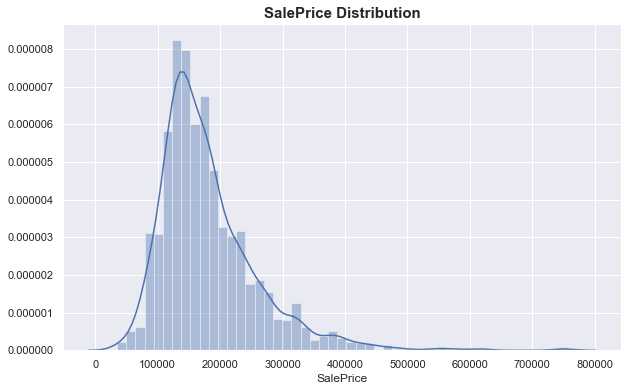

In [86]:
#Histogram of the feature SalePrice
plt.figure(figsize=(10,6))
_ = sns.distplot(train_df['SalePrice'])
plt.title('SalePrice Distribution', fontsize = 15, weight = 'bold')

In [87]:
#Computing Skewedness and Kurtosis
print('skewedness : %f' % train_df['SalePrice'].skew())
print('kurtosis : %f' % train_df['SalePrice'].kurt())

skewedness : 1.882876
kurtosis : 6.536282


### Inference

1. Positive skewedness is visible
2. Deviation from normal distribution
 
Basically, it can be inferred that majority of the houses were sold at a price lesser than the average mean price. However, for now this can be for any number of reasons.

### Analysing SalePrice

To better understand our dataset, we can look at each variable and try to understand their meaning and relevance to our problem. This will give us the flavour of our dataset which will help us make a few assumptions regarding the significance those features may have in predicting the SalePrice.

I went through this process and concluded that the following variables may play an important role in this problem:
1. GrLivArea
2. TotalBsmtSF
3. YearBuilt 
4. OverallQual 

The main idea behind this step is to think a little about our data and test the assumptions we make as a startiting point for our analyis.

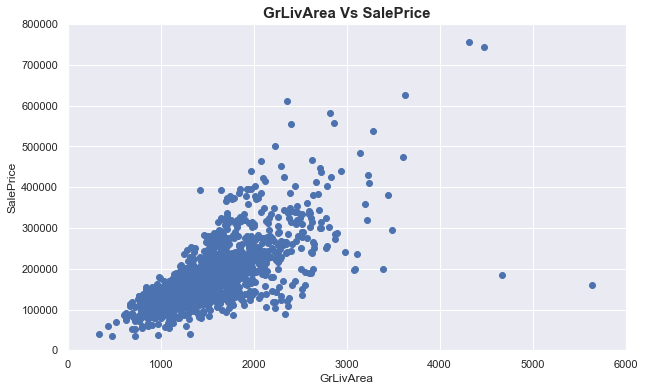

In [88]:
#Scatter plot of GrLivArea vs SalePrice
plt.figure(figsize=(10,6))
data = pd.concat([train_df['SalePrice'], train_df['GrLivArea']], axis= 1)
_ = plt.scatter(data['GrLivArea'], data['SalePrice'])
_ = plt.ylim(0,800000)
_ = plt.xlim(0, 6000)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
_ = plt.title('GrLivArea Vs SalePrice', fontsize = 15, weight = 'bold')

### Inference

As per our initial assumption that feature GrLivArea may have an import role to play, it can be seen that it indeed has a strong corelation with SalePrice

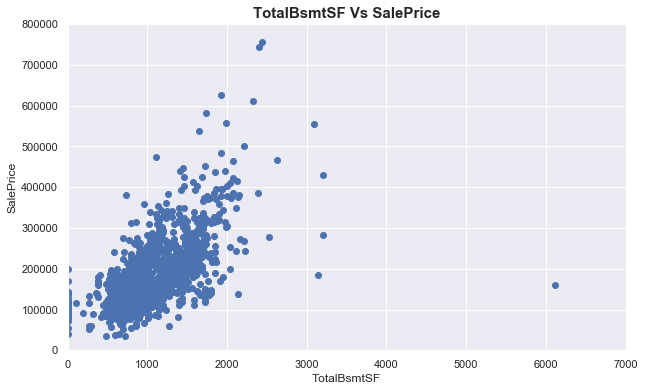

In [89]:
#Scatter plot of TotalBsmtSF vs SalePrice
plt.figure(figsize=(10,6))
data = pd.concat([train_df['SalePrice'], train_df['TotalBsmtSF']], axis=1)
_ = plt.scatter(data['TotalBsmtSF'], data['SalePrice'])
_ = plt.ylim(0,800000)
_ = plt.xlim(0, 7000)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
_ = plt.title('TotalBsmtSF Vs SalePrice', fontsize = 15, weight = 'bold')

### Inference

As per our initial assumption that feature TotalBsmtSF may have an import role to play, it can be seen that it indeed has a strong corelation with SalePrice

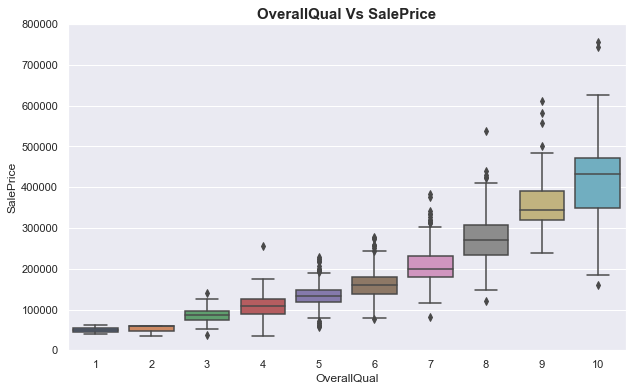

In [90]:
#Scatter plot of OverallQual vs SalePrice
plt.figure(figsize=(10,6))
data = pd.concat([train_df['SalePrice'], train_df['OverallQual']], axis=1)
_ = sns.boxplot(data['OverallQual'], data['SalePrice'])
_ = plt.ylim(0,800000)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
_ = plt.title('OverallQual Vs SalePrice', fontsize = 15, weight = 'bold')

### Inference

As per our initial assumption that feature OverallQual may have an import role to play, it can be seen that it indeed has a strong corelation with SalePrice

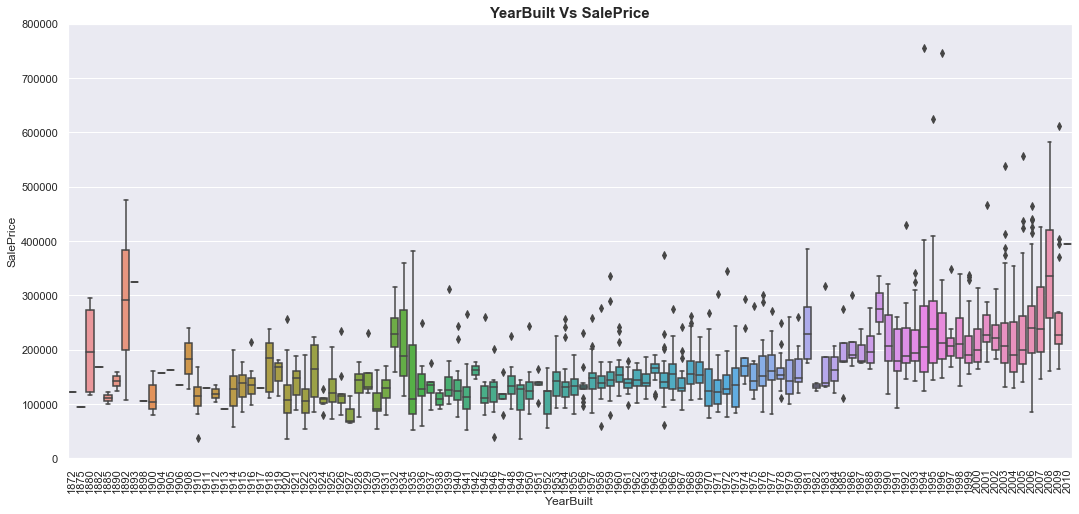

In [91]:
#Scatter plot of OverallQual vs SalePrice
plt.figure(figsize=(18, 8))
data = pd.concat([train_df['SalePrice'], train_df['YearBuilt']], axis=1)
_ = sns.boxplot(data['YearBuilt'], data['SalePrice'])
_ = plt.ylim(0,800000)
plt.xticks(rotation=90)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
_ = plt.title('YearBuilt Vs SalePrice', fontsize = 15, weight = 'bold')

### Inference

Although it is not a strong tendency it can be observed that new homes tend to be slightly costlier than old homes.

Note: we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.

## Summary

1. 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.

2. 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

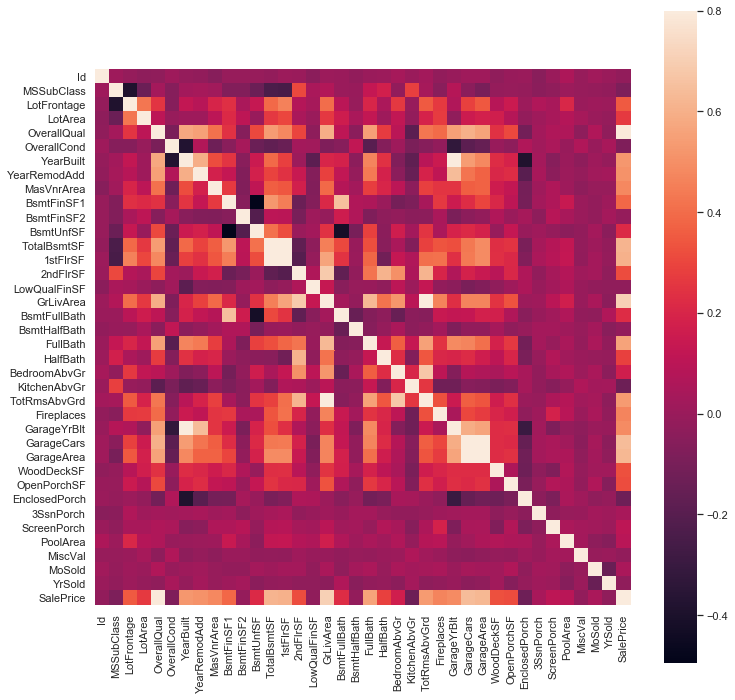

In [92]:
#Feature Corelation Matrix
plt.figure(figsize=(12, 12))
corrmat = train_df.corr()
_ = sns.heatmap(corrmat, vmax=.8, square=True)

### Inference

1. It can be inferred that there exists a strong corelation betwen 'TotalBsmtSF' and '1stFlrSF' variables
2. The 'GarageX' variables also indicate a strong corelation tendency.
3. It can once again be verified that 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' have a strong linear relationship

The heatmap further reveals that several other features can also be taken into consideration

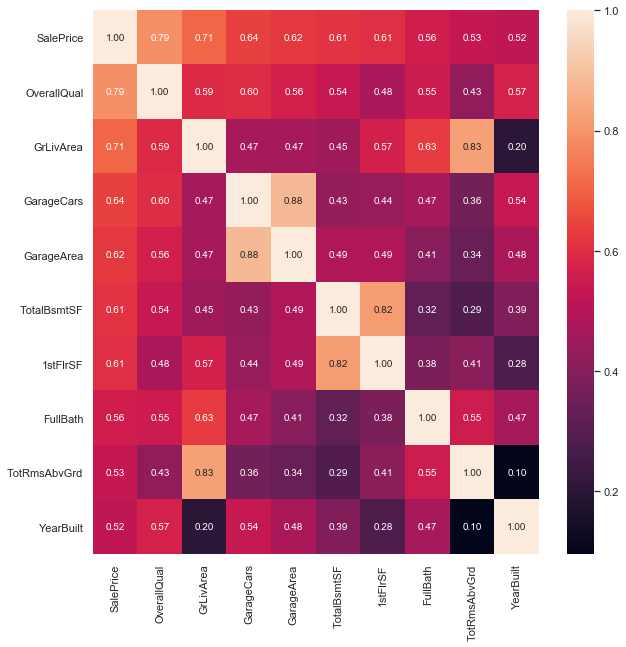

In [93]:
#salePrice corelation matrix
feature_count = 10      #considering the top 10 features with maximum corelation with SalePrice
features = corrmat.nlargest(feature_count, 'SalePrice')['SalePrice'].index
plt.figure(figsize=(10,10))
corr_mat = np.corrcoef(train_df[features].values.T)
_ = sns.heatmap(corr_mat, cbar = True, annot = True, fmt='.2f', annot_kws={'size': 10},\
                yticklabels=features.values, xticklabels=features.values)

### Inference

1. 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. 
2. 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, the number of cars that fit into the garage is a consequence of the garage area.Therefore, we just need one of these variables in our analysis.
3. 'TotalBsmtSF' and '1stFloor' also seem to be corelated. We can keep any one of them
4. 'TotRmsAbvGrd' and 'GrLivArea' are corelated


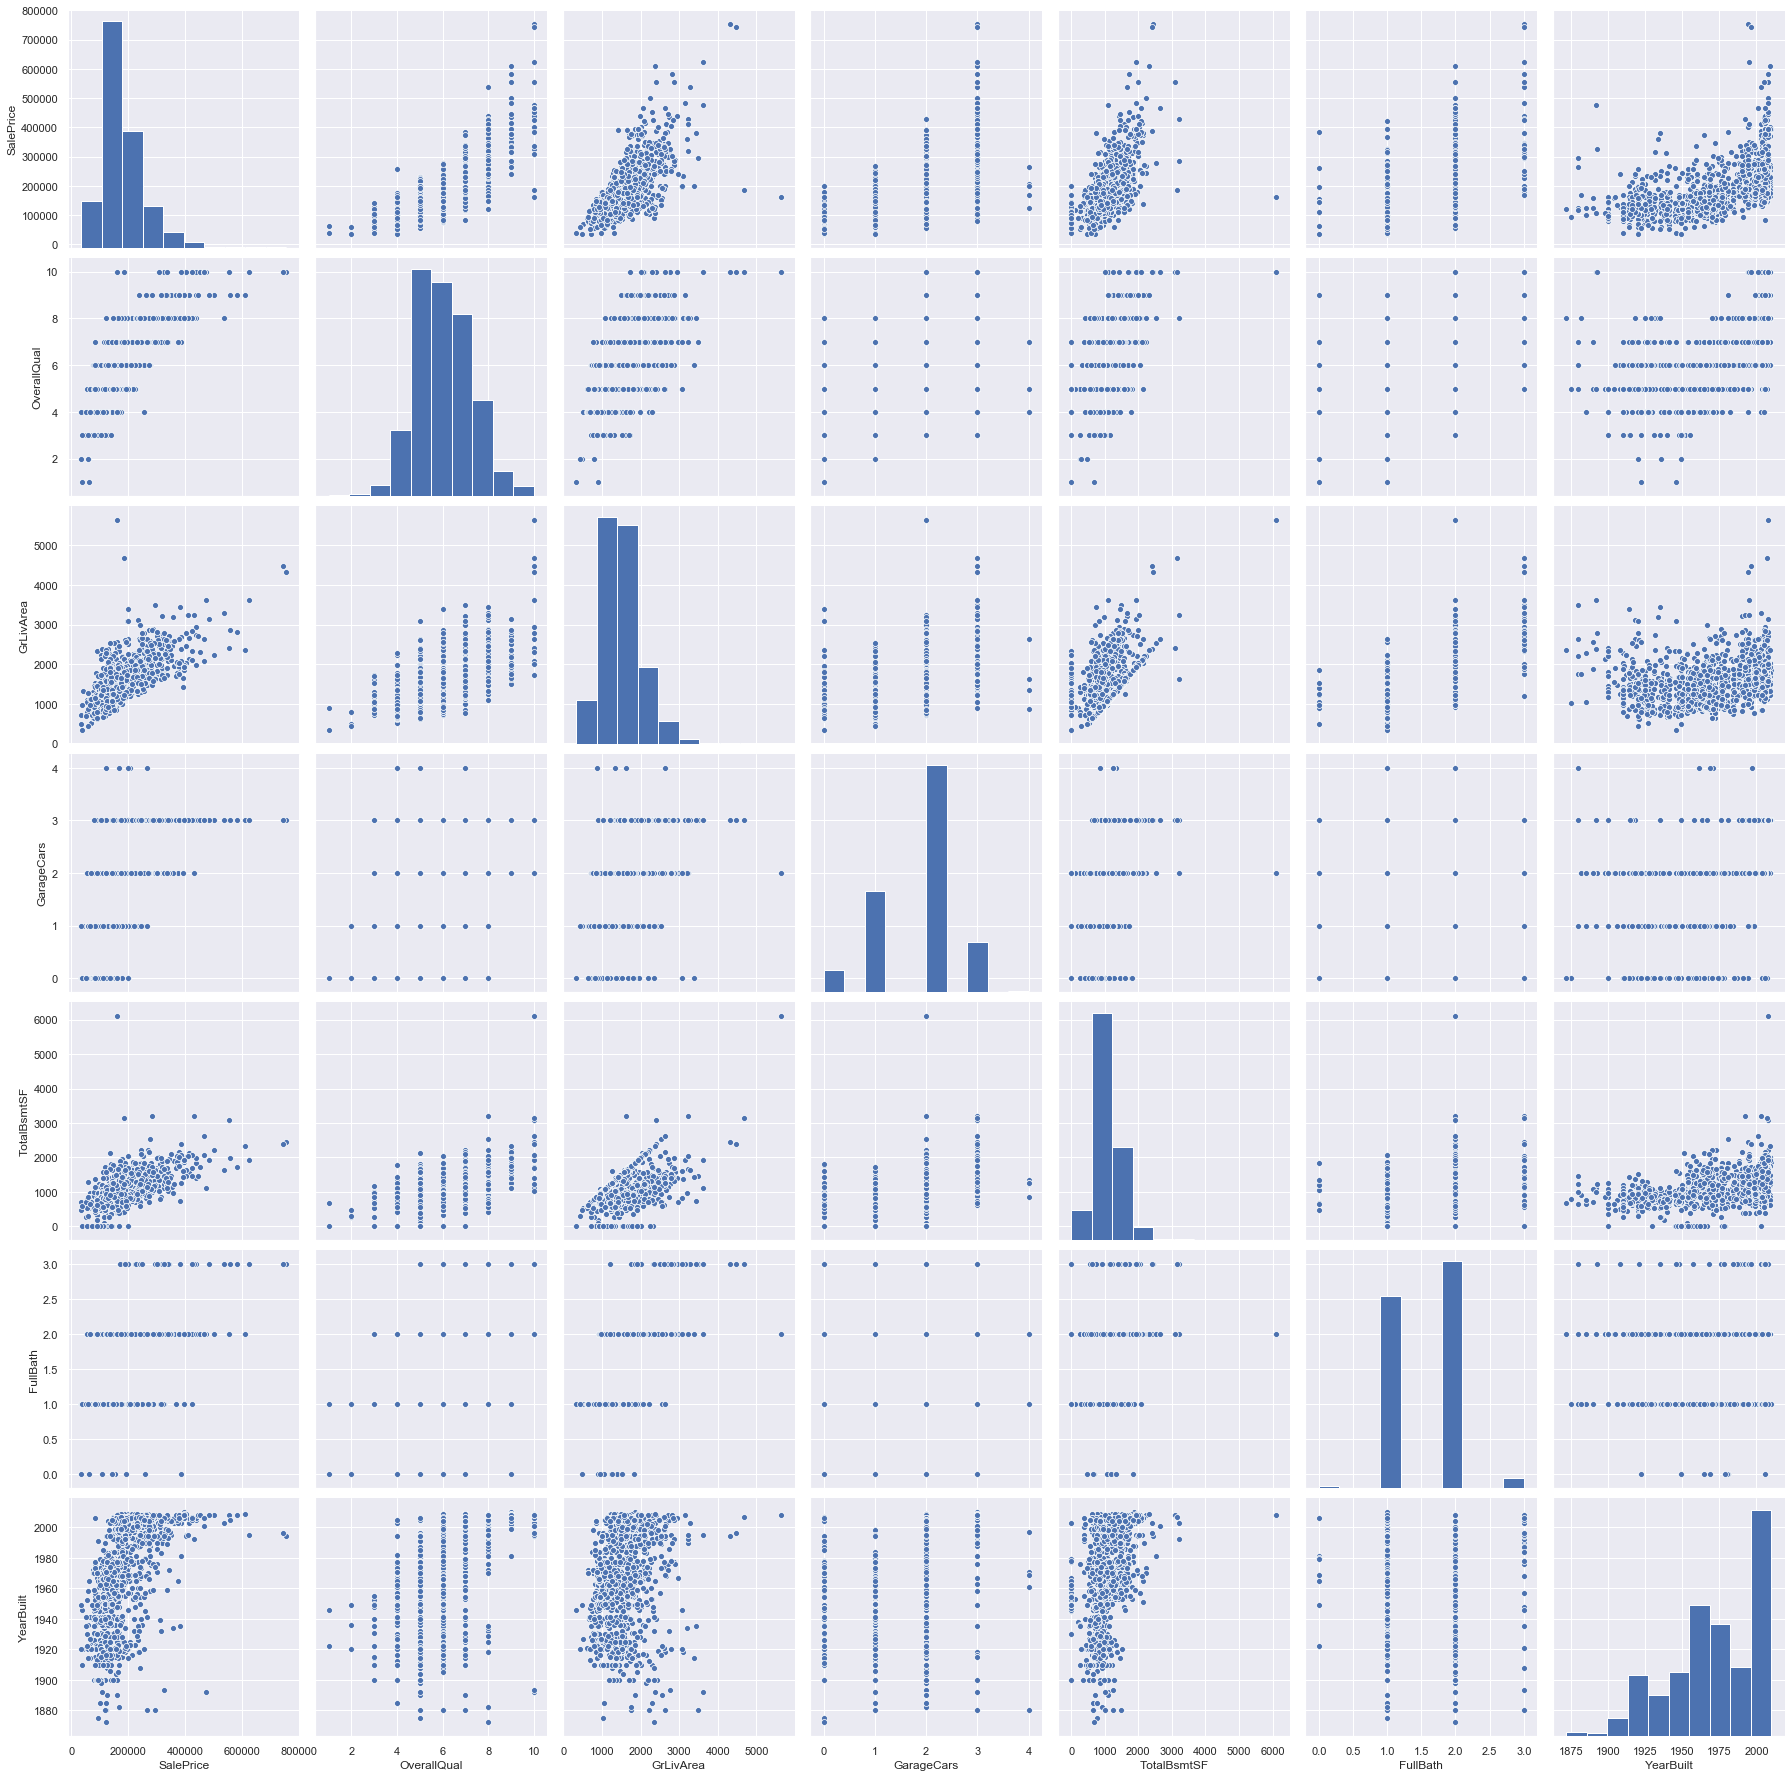

In [94]:
#Pairwise plot of highly corealted features with SalePrice
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
_ = sns.pairplot(train_df[cols], size = 3.5)
plt.show()

## 4. Univariate Analysis

In [95]:
#Standardizing Data 
saleprice_scaled = StandardScaler().fit_transform(train_df['SalePrice'][:, np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)


outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


### Inference

1. Low range values are similar and not too far from 0.
2. High range values are far from 0 and the 7.something values are really out of range.

## 5. Bivariate Analysis

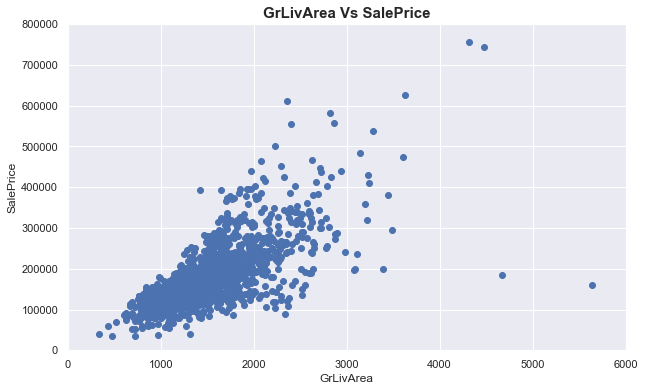

In [96]:
plt.figure(figsize=(10,6))
data = pd.concat([train_df['SalePrice'], train_df['GrLivArea']], axis= 1)
_ = plt.scatter(data['GrLivArea'], data['SalePrice'])
_ = plt.ylim(0,800000)
_ = plt.xlim(0, 6000)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
_ = plt.title('GrLivArea Vs SalePrice', fontsize = 15, weight = 'bold')

## Inference

1. The two values with bigger 'GrLivArea' seem to not follow the trend. We can speculate and attribute the low price hoping that it might maybe an agricultral land. However, since these points dont follow the trend they can be considered as outliers.

2. The two observations in the top of the plot are those 7.something observations that we found in the univariate analysis. However, since they are following the trend we can continue with them.

In [97]:
#Deleting outliers
train_df.sort_values(by = 'GrLivArea', ascending = False)[:2]
train_df = train_df.drop(train_df[train_df['Id'] == 1299].index)
train_df = train_df.drop(train_df[train_df['Id'] == 524].index)

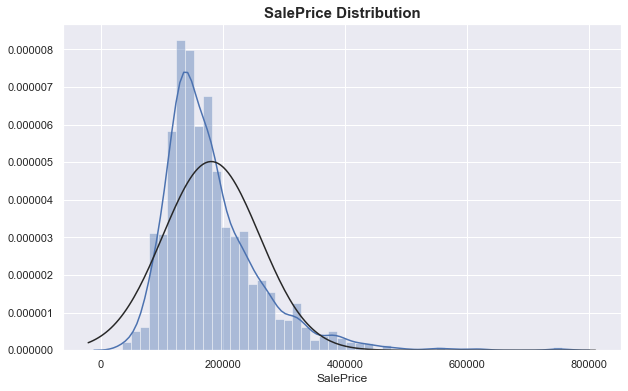

<Figure size 432x288 with 0 Axes>

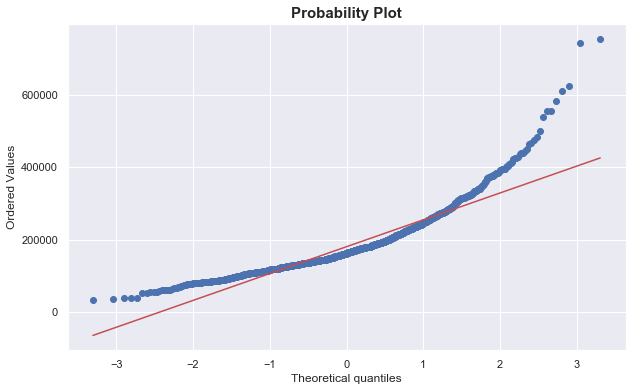

In [98]:
plt.figure(figsize=(10,6))
_ = sns.distplot(train_df['SalePrice'], fit=norm)
_ = plt.title('SalePrice Distribution', fontsize = 15, weight = 'bold')

fig = plt.figure()
plt.figure(figsize=(10,6))
_ = stats.probplot(train_df['SalePrice'], plot=plt)
_ = plt.title('Probability Plot', fontsize = 15, weight = 'bold')

SalePrice shows positive skewedness, peakedness and does not follow the diagonal line

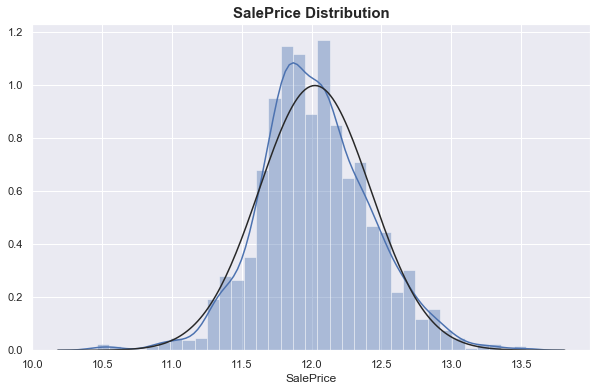

<Figure size 432x288 with 0 Axes>

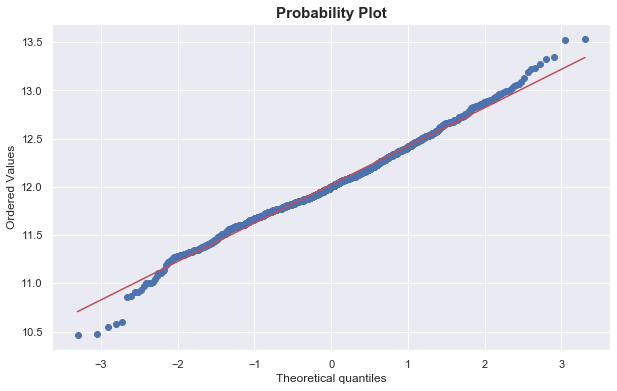

In [99]:
#New transformed plot
plt.figure(figsize=(10,6))
_ = sns.distplot(np.log1p(train_df['SalePrice']), fit=norm)
_ = plt.title('SalePrice Distribution', fontsize = 15, weight = 'bold')

fig = plt.figure()
plt.figure(figsize=(10,6))
_ = stats.probplot(np.log1p(train_df['SalePrice']), plot=plt)
_ = plt.title('Probability Plot', fontsize = 15, weight = 'bold')

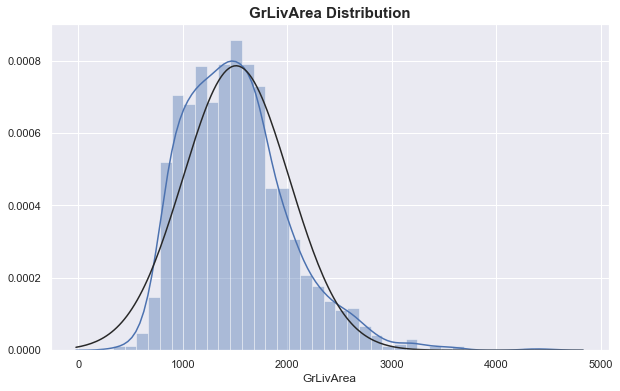

<Figure size 432x288 with 0 Axes>

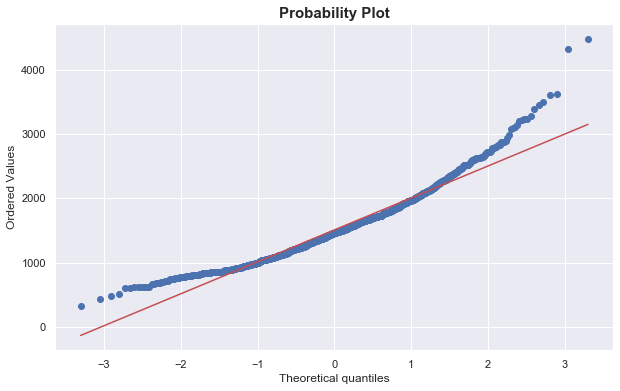

In [100]:
# Normality of GrLivArea
plt.figure(figsize=(10,6))
_ = sns.distplot(train_df['GrLivArea'], fit=norm)
_ = plt.title('GrLivArea Distribution', fontsize = 15, weight = 'bold')

fig = plt.figure()
plt.figure(figsize=(10,6))
_ = stats.probplot(train_df['GrLivArea'], plot=plt)
_ = plt.title('Probability Plot', fontsize = 15, weight = 'bold')

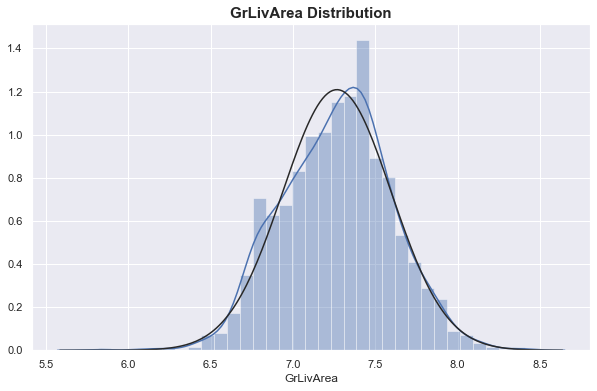

<Figure size 432x288 with 0 Axes>

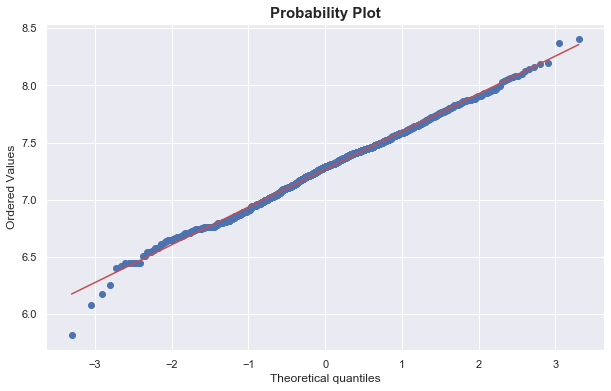

In [101]:
#New Transformed plot
plt.figure(figsize=(10,6))
_ = sns.distplot(np.log1p(train_df['GrLivArea']), fit=norm)
_ = plt.title('GrLivArea Distribution', fontsize = 15, weight = 'bold')

fig = plt.figure()
plt.figure(figsize=(10,6))
_ = stats.probplot(np.log1p(train_df['GrLivArea']), plot=plt)
_ = plt.title('Probability Plot', fontsize = 15, weight = 'bold')

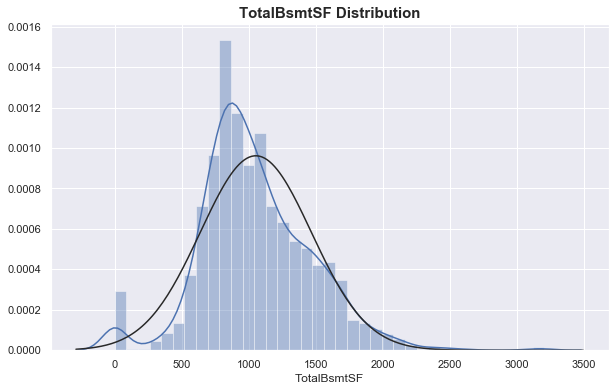

<Figure size 432x288 with 0 Axes>

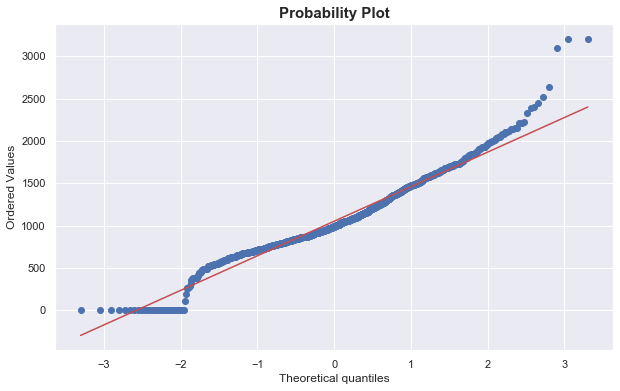

In [102]:
# Normality of TotalBsmtSF
plt.figure(figsize=(10,6))
_ = sns.distplot(train_df['TotalBsmtSF'], fit=norm)
_ = plt.title('TotalBsmtSF Distribution', fontsize = 15, weight = 'bold')

fig = plt.figure()
plt.figure(figsize=(10,6))
_ = stats.probplot(train_df['TotalBsmtSF'], plot=plt)
_ = plt.title('Probability Plot', fontsize = 15, weight = 'bold')

1. Skewness is evident.
2. A significant number of observations with value zero (houses without basement).
3. Zero value doesn't allow us to do log transformations.

In [103]:
#Creating a new column and labelling those values wiht TotalBsmtSF =0 as 0
train_df['HasBsmt'] = pd.Series(len(train_df['TotalBsmtSF']), index=train_df.index)
train_df['HasBsmt'] = 0 
train_df.loc[train_df['TotalBsmtSF']>0,'HasBsmt'] = 1

In [104]:
#transform data
train_df.loc[train_df['HasBsmt']==1,'TotalBsmtSF'] = np.log1p(train_df['TotalBsmtSF'])

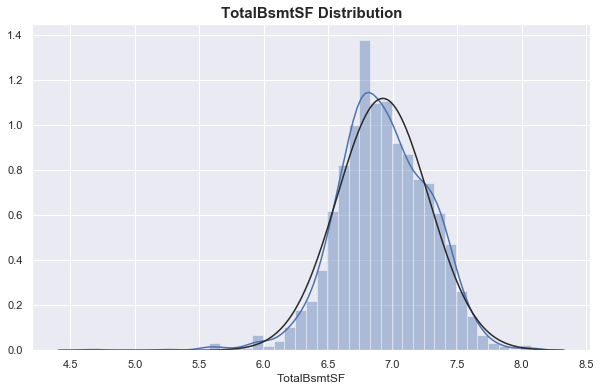

<Figure size 432x288 with 0 Axes>

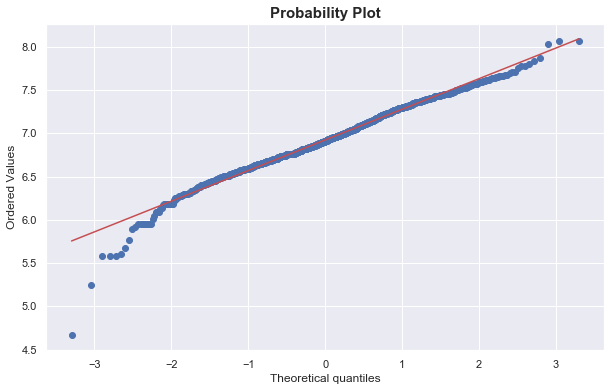

In [105]:
#After transformation
plt.figure(figsize=(10,6))
_ = sns.distplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
_ = plt.title('TotalBsmtSF Distribution', fontsize = 15, weight = 'bold')

fig = plt.figure()
plt.figure(figsize=(10,6))
_ = stats.probplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)
_ = plt.title('Probability Plot', fontsize = 15, weight = 'bold')

In [106]:
#Dropping the HasBsmt column before data preparation
train_df.drop('HasBsmt', axis = 1, inplace = True)

## 6. Data Preparation

In [107]:
#Saving ID column before dropping it in both the datasets

train_id = train_df['Id']
test_id = test_df['Id']

#Dropping the 'Id' colum since it's unnecessary for  the prediction process
train_df.drop('Id', axis = 1, inplace =True)
test_df.drop('Id', axis = 1, inplace =True)

### Feature Engineering

In [108]:
#Combining both train and test data set
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y_train = np.log1p(train_df.SalePrice.values)

combine_data = pd.concat((train_df, test_df)).reset_index(drop=True)
combine_data.drop(['SalePrice'], axis=1, inplace=True)

print("all_data size is : {}".format(combine_data.shape))

all_data size is : (2917, 79)


In [109]:
#Handling missing data
combine_data_na = (combine_data.isnull().sum() / len(combine_data)) * 100
combine_data_na = combine_data_na.drop(combine_data_na[combine_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :combine_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

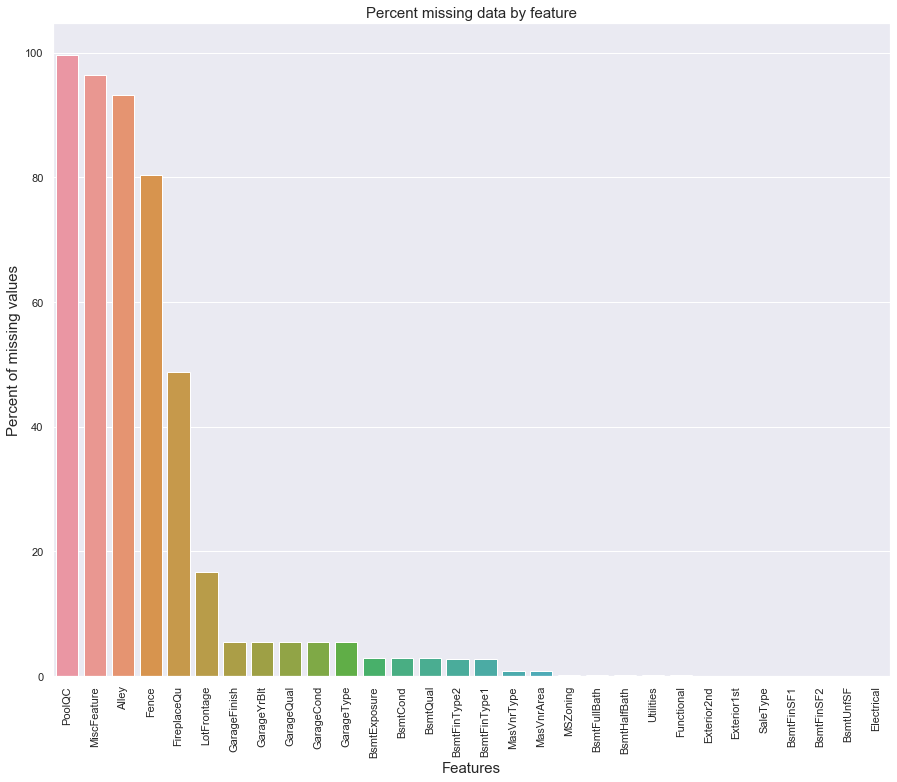

In [110]:
#Bar plot of percent of missing values
_ = plt.figure(figsize=(15, 12))
sns.barplot(x=combine_data_na.index, y=combine_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.xticks(rotation='90')
plt.title('Percent missing data by feature', fontsize=15)

In [111]:
#Imputing missing values
combine_data["PoolQC"] = combine_data["PoolQC"].fillna("None")
combine_data["MiscFeature"] = combine_data["MiscFeature"].fillna("None")
combine_data["Alley"] = combine_data["Alley"].fillna("None")
combine_data["Fence"] = combine_data["Fence"].fillna("None")
combine_data["FireplaceQu"] = combine_data["FireplaceQu"].fillna("None")

#Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood 
#we can fill in missing values by the median LotFrontage of the neighborhood
combine_data["LotFrontage"] = combine_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#Replacing missing data with 0
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    combine_data[col] = combine_data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    combine_data[col] = combine_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    combine_data[col] = combine_data[col].fillna(0)

#Imputing NaN values as None
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    combine_data[col] = combine_data[col].fillna('None')

combine_data["MasVnrType"] = combine_data["MasVnrType"].fillna("None")
combine_data["MasVnrArea"] = combine_data["MasVnrArea"].fillna(0)

#'RL' is by far the most common value. So we can fill in missing values with 'RL'
combine_data['MSZoning'] = combine_data['MSZoning'].fillna(combine_data['MSZoning'].mode()[0])

#For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . 
#Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
combine_data = combine_data.drop(['Utilities'], axis=1)

#data description says NA means typical
combine_data["Functional"] = combine_data["Functional"].fillna("Typ")

combine_data['Electrical'] = combine_data['Electrical'].fillna(combine_data['Electrical'].mode()[0])
combine_data['KitchenQual'] = combine_data['KitchenQual'].fillna(combine_data['KitchenQual'].mode()[0])
combine_data['Exterior1st'] = combine_data['Exterior1st'].fillna(combine_data['Exterior1st'].mode()[0])
combine_data['Exterior2nd'] = combine_data['Exterior2nd'].fillna(combine_data['Exterior2nd'].mode()[0])
combine_data['SaleType'] = combine_data['SaleType'].fillna(combine_data['SaleType'].mode()[0])
combine_data['MSSubClass'] = combine_data['MSSubClass'].fillna("None")

In [112]:
#Transforming numerical variables that can be categorical

#MSSubClass=The building class
combine_data['MSSubClass'] = combine_data['MSSubClass'].astype('category')


#Changing OverallCond into a categorical variable
combine_data['OverallCond'] = combine_data['OverallCond'].astype('category')


#Year and month sold are transformed into categorical features.
combine_data['YrSold'] = combine_data['YrSold'].astype('category')
combine_data['MoSold'] = combine_data['MoSold'].astype('category')

In [113]:
#Label Encoding some categorical variables that may contain information in their ordering set
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
#apply LabelEncoder to categorical features
for col in cols:
    labelencoder = LabelEncoder() 
    labelencoder.fit(list(combine_data[col].values)) 
    combine_data[col] = labelencoder.transform(list(combine_data[col].values))

# shape        
print('Shape combine_data: {}'.format(combine_data.shape))

Shape combine_data: (2917, 78)


In [114]:
#Since area related features are very important to determine house prices, 
#we add one more feature which is the total area of basement, first and second floor areas of each house
combine_data['TotalSF'] = combine_data['TotalBsmtSF'] + combine_data['1stFlrSF'] + combine_data['2ndFlrSF']


In [115]:
#Check remaining missing values if any 
combine_data_na = (combine_data.isnull().sum() / len(combine_data)) * 100
combine_data_na = combine_data_na.drop(combine_data_na[combine_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :combine_data_na})
missing_data.head()


,Missing Ratio


Indicating there are no more missing values

### Skewedness of Numerical Features 

In [116]:
#Dealing with skewedness of numerical features
numeric_feats = combine_data.dtypes[combine_data.dtypes != "object"].index

#Computing the numerical skewed component
skewed_feats = combine_data[numeric_feats].apply(lambda x: x.dropna().skew()).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Skew in numerical features: 



,Skew
MiscVal,21.950962
PoolArea,17.697766
LotArea,13.116240
LowQualFinSF,12.090757
3SsnPorch,11.377932
LandSlope,4.975813
KitchenAbvGr,4.302763
BsmtFinSF2,4.146636
EnclosedPorch,4.004404
ScreenPorch,3.947131


In [117]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 59 skewed numerical features to Box Cox transform


In [118]:
#We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    combine_data[feat] = boxcox1p(combine_data[feat], lam)

In [119]:
#Encoding dummy variables
combine_data = pd.get_dummies(combine_data)
print(combine_data.shape)

(2917, 220)


In [120]:
#Obtaining the new prepared train and test data
train_df = combine_data[:ntrain]
test_df = combine_data[ntrain:]

In [121]:
#Shape of training and test datasets
print("The shape of the train dataset is: %s" % str(train_df.shape))
print("The shape of the train dataset is: %s" % str(test_df.shape))

The shape of the train dataset is: (1458, 220)
The shape of the train dataset is: (1459, 220)


In [122]:
#Splitting the dataset into train and test split data
X = train_df
y = y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state= 42)

## 7. Prediction Models

Our First attempt in model prediction willbe to use Simple Regularized Linear Regression Models
1. Ridge Regression
2. Lasso Regression
3. ElasticNet Regression
4. XGBoosting Regression

The performance is estimated by computing the root mean squared error(RMSE) and it is computer for different values of the hyperparameters to identufy the most suitable one. This is done using K-Fold CV.

In [123]:
#Defining a general function that computes the RMSE of any model
def rmse_cv(reg_model):
    rmse= np.sqrt(-cross_val_score(reg_model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

### 1. Ridge Regression

We start with a list of initial parameters as these parameters need to be manually tested to obtain the best one

In [124]:
#A list of values for the hyperparameter alpha
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

#Computing mean RMSE for each value of the alpha hyperparameter
ridge_cv = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

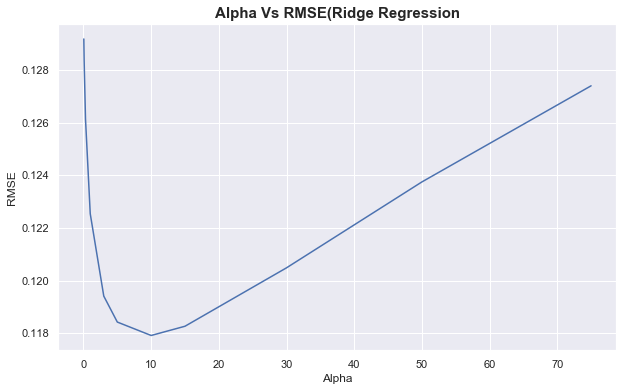

In [125]:
#Visualizing the RMSE values Vs alpha
data = pd.Series(ridge_cv, index = alphas)
plt.figure(figsize=(10,6))
data.plot()
plt.xlabel('Alpha')
plt.ylabel('RMSE')
_ = plt.title('Alpha Vs RMSE(Ridge Regression', fontsize = 15, weight = 'bold')


We can observe that alpha = 10 has the lowest RMSE value. The RMSE value increase with increase in alpha post value 10 and also starts reducing as it approaches 10 from alpha 0.05

When alpha is too large the regularization is too strong and the model cannot capture all the complexities in the data. If however we let the model be too flexible (alpha small) the model begins to overfit. A value of alpha = 10 is about right based on the plot above.

In [126]:
#The smallest RMSE value obtained from Ridge Regression
min(ridge_cv) 

0.11791530346180794

In [127]:
#Computing the R^2 value on the test data set
ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(X_train, y_train)

ridge_reg.score(X_test, y_test)

0.899848698663041

### 2. Lasso Regression

In [128]:
alphas = [1, 0.1, 0.001, 0.0005, 0.0003,0.0001]

#Computing mean RMSE for each value of the alpha hyperparameter
lasso_cv = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]

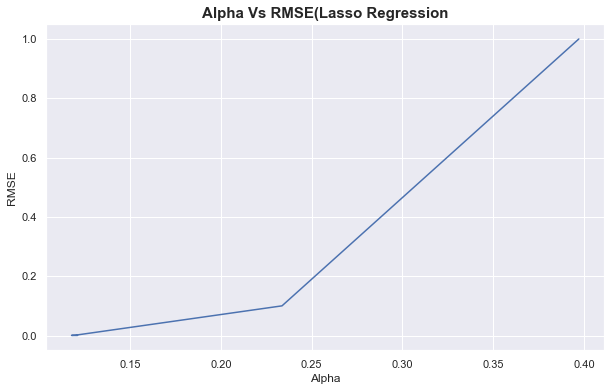

In [129]:
#Visualizing the RMSE values Vs alpha
data = pd.Series(lasso_cv, index = alphas)
plt.figure(figsize=(10,6))
plt.plot(lasso_cv, alphas)
plt.xlabel('Alpha')
plt.ylabel('RMSE')
_ = plt.title('Alpha Vs RMSE(Lasso Regression', fontsize = 15, weight = 'bold')

In [130]:
data

1.0000    0.397131
0.1000    0.233710
0.0010    0.119896
0.0005    0.117913
0.0003    0.117849
0.0001    0.121137
dtype: float64

In [131]:
#The smallest RMSE value obtained from Lasso Regression
min(lasso_cv)

0.11784914054270419

We can observe that the general trend is the increase in RMSE value as the value of the hyperparameters increase. 
On close observation we notice alpha = 0.005 gives the least RMSE values compared to the rest of the values

In [132]:
#Computing the R^2 value on the test data set
lasso_reg = Lasso(alpha=0.0005)
lasso_reg.fit(X_train,y_train)

lasso_reg.score(X_test, y_test)

0.9189558696446456

In [133]:
lasso_coef = pd.Series(lasso_reg.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(lasso_coef != 0)) + " variables and eliminated the other " +  str(sum(lasso_coef == 0)) + " variables")

Lasso picked 97 variables and eliminated the other 123 variables


We can also get a glimpse of the most important variables by plotting on a graph

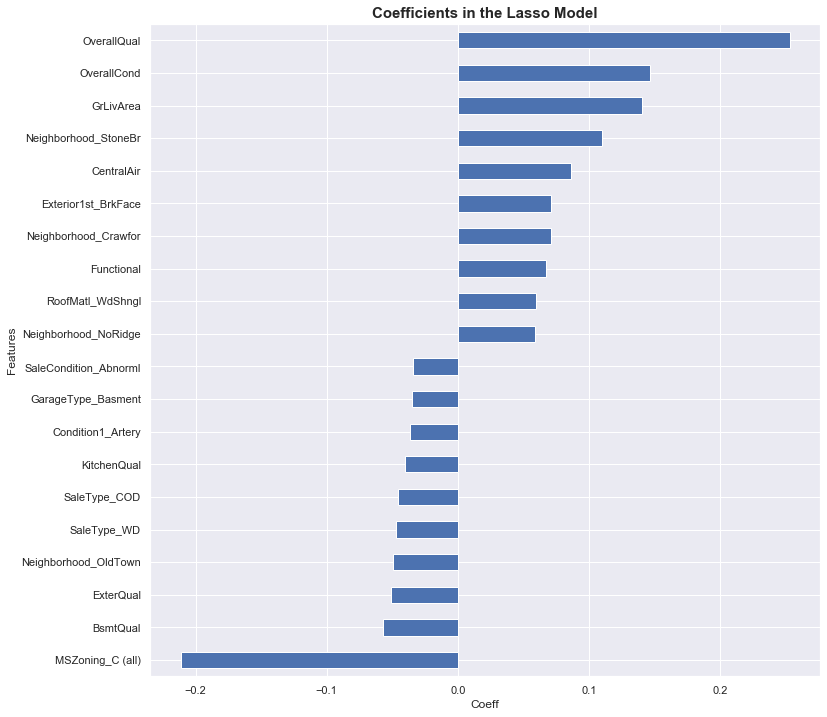

In [134]:
lasso_coef_imp = pd.concat([lasso_coef.sort_values().head(10), lasso_coef.sort_values().tail(10)])
plt.figure(figsize=(12,12))
lasso_coef_imp.plot(kind='barh')
plt.xlabel('Coeff')
plt.ylabel('Features')
_ = plt.title('Coefficients in the Lasso Model', fontsize = 15, weight = 'bold')

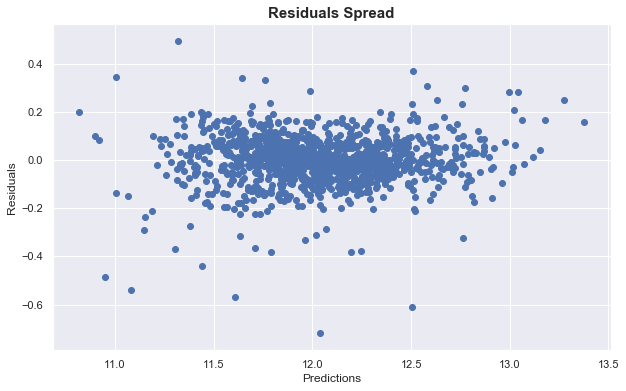

In [135]:
#computing the residual differece between the actual and predicted values 
preds = pd.DataFrame({"preds":lasso_reg.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]

#Plotting the residual difference between predicted and computed values
plt.figure(figsize=(10,6))
_ = plt.scatter(x = preds['preds'], y = preds["residuals"])
plt.xlabel('Predictions')
plt.ylabel('Residuals')
_ = plt.title('Residuals Spread', fontsize = 15, weight = 'bold')

We can observe that for most predictions the residuals are clustered around 0 which is a good sign. The largest negative residual is within 0.7 and the largest positive residual is within 0.5

### 3. Elastic Net Regression

In [136]:
alphas = [1, 0.1, 0.001, 0.0005, 0.0003,0.0001]

#Computing mean RMSE for each value of the alpha hyperparameter
elasticnet_cv = [rmse_cv(ElasticNet(alpha = alpha, l1_ratio=0.9)).mean() for alpha in alphas]

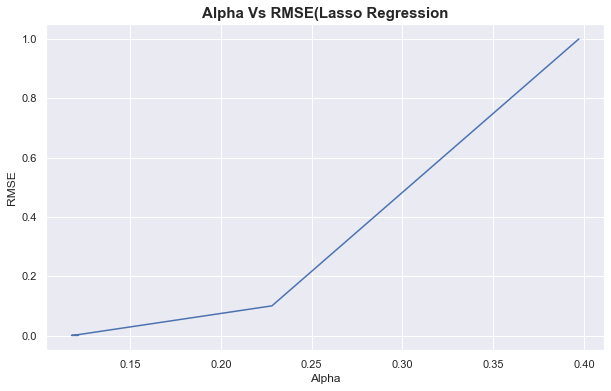

In [137]:
#Visualizing the RMSE values Vs alpha
data = pd.Series(elasticnet_cv, index = alphas)
plt.figure(figsize=(10,6))
plt.plot(elasticnet_cv, alphas)
plt.xlabel('Alpha')
plt.ylabel('RMSE')
_ = plt.title('Alpha Vs RMSE(Lasso Regression', fontsize = 15, weight = 'bold')

In [138]:
data

1.0000    0.397131
0.1000    0.228164
0.0010    0.119435
0.0005    0.117903
0.0003    0.117842
0.0001    0.121650
dtype: float64

In [139]:
min(elasticnet_cv)

0.11784162643844813

We can observe that the general trend is the increase in RMSE value as the value of the hyperparameters increase. 
On close observation we notice alpha = 0.005 gives the least RMSE values compared to the rest of the values

In [140]:
#Computing the R^2 value on the test data set
elastic_reg = ElasticNet(alpha=0.0005,l1_ratio=0.9)
elastic_reg.fit(X_train,y_train)

elastic_reg.score(X_test, y_test)

0.9190737121945374

This result is slightly better than lasso regression

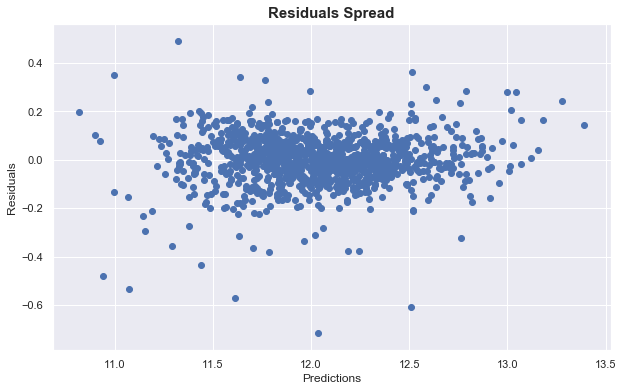

In [141]:
#computing the residual differece between the actual and predicted values 
preds = pd.DataFrame({"preds":elastic_reg.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]

#Plotting the residual difference between predicted and computed values
plt.figure(figsize=(10,6))
_ = plt.scatter(x = preds['preds'], y = preds["residuals"])
plt.xlabel('Predictions')
plt.ylabel('Residuals')
_ = plt.title('Residuals Spread', fontsize = 15, weight = 'bold')

### 4. XGBoosting Regression

In [142]:
#Creating DMatrix to be used with XGBRegressor
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

#Intializing hyper parameters
params = {"max_depth":2, "eta":0.1}
xgb_cv = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

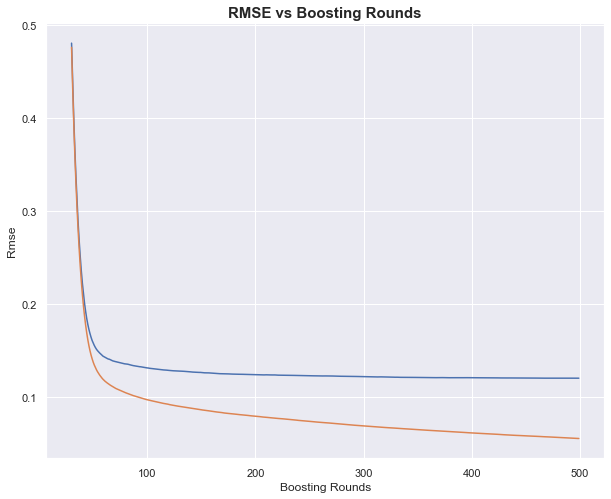

In [143]:
plt.figure(figsize=(10,8))
#_ = xgb_cv.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()
plt.plot(xgb_cv.loc[30:,["test-rmse-mean", "train-rmse-mean"]])
plt.xlabel('Boosting Rounds')
plt.ylabel('Rmse')
_ = plt.title('RMSE vs Boosting Rounds', fontsize = 15, weight = 'bold')


We notice that the test rmse error flattens out for boosting value = 360 approximately

In [144]:
#Fitting the Regressor and training on train data
xgb_reg = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=360, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [145]:
#Computing the performance on test data
elastic_reg.score(X_test, y_test)

0.9190737121945374

## 8. Conclusion

At this point, we realize that both Elastic Net and XGB have somewhat similar performance, lets try to understand this better with a graph

In [146]:
# computing the predictions on the hold out train_df data using both Elastic Net and XGBoosting
xgb_pred = np.expm1(xgb_reg.predict(X_test))
elastic_pred = np.expm1(elastic_reg.predict(X_test))
y_test = np.expm1(y_test)

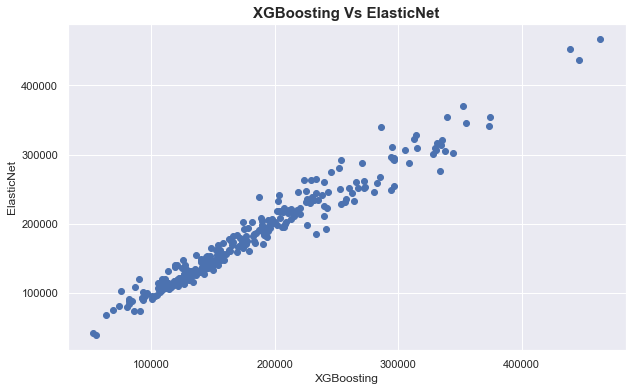

In [147]:
#Visualising the predictrions made by both the algorithms
predictions = pd.DataFrame({"XGBoosting":xgb_pred, "ElasticNet":elastic_pred})
plt.figure(figsize=(10,6))
_ = plt.scatter(x = predictions["XGBoosting"], y = predictions["ElasticNet"])
plt.xlabel('XGBoosting')
plt.ylabel('ElasticNet')
_ = plt.title('XGBoosting Vs ElasticNet', fontsize = 15, weight = 'bold')


Many times it makes sense to take a weighted average of uncorrelated results - this usually imporoves the score although in this case it doesn't help that much.

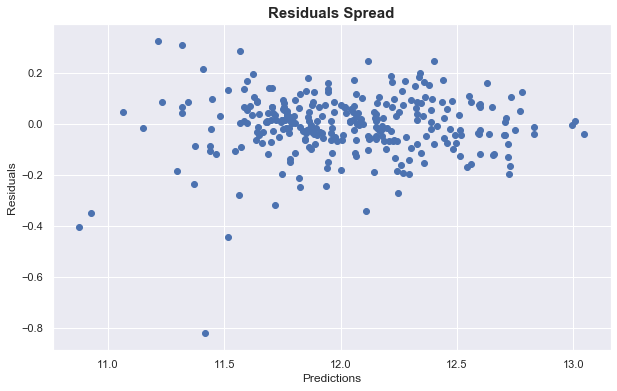

In [148]:
#computing the residual differece between the actual and predicted values 
preds = pd.DataFrame({"preds":xgb_reg.predict(X_test), "true": np.log1p(y_test)})
preds["residuals"] = preds["true"] - preds["preds"]

#Plotting the residual difference between predicted and computed values
plt.figure(figsize=(10,6))
_ = plt.scatter(x = preds['preds'], y = preds["residuals"])
plt.xlabel('Predictions')
plt.ylabel('Residuals')
_ = plt.title('Residuals Spread', fontsize = 15, weight = 'bold')

From the above graph we can conclude that most of the residuals lie between positive 0.2 and negative 0.2 and this can be considered a good fit

In [149]:
finalpred_df = pd.DataFrame({'Prediction': xgb_pred, 'Actual': y_test })

In [150]:
#Sample predictions
finalpred_df.iloc[:20,:]

,Prediction,Actual
0,218879.640625,190000.0
1,97000.710938,100000.0
2,107530.578125,115000.0
3,148468.156250,159000.0
4,329573.843750,315500.0
5,140687.750000,137500.0
6,243195.640625,311500.0
7,335021.625000,310000.0
8,270769.406250,281000.0
9,140183.093750,135500.0
